### Step 1: Import Libraries and Load Fashion-MNIST Dataset

We import TensorFlow and Keras functions to load data and build CNNs.  
The Fashion-MNIST dataset contains 70,000 grayscale images in 10 fashion categories, with training and test sets pre-split.

Loading it directly from TensorFlow Keras datasets makes it easy to start.


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


### Step 2: Preprocess Data

- Normalize pixel values to [0, 1] by dividing by 255 for faster and more stable training.
- Reshape the dataset to include channel dimension (28, 28, 1) as required by CNN input.
- One-hot encode the labels for multi-class classification with 10 categories.


In [4]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to (28, 28, 1) for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


### Step 3: Build CNN Model

- Add Conv2D layers to extract spatial features using convolutional filters with ReLU activation.
- Use MaxPooling2D to reduce spatial dimensions while retaining important features.
- Flatten the output and use Dense layers for classification.
- Final output layer uses softmax for multi-class probabilities.
- Dropout is used to reduce overfitting.


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Step 4.1: Training the Model using simple method

The model is trained on the training data for a number of epochs with a validation split for monitoring overfitting.


In [7]:
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.7787 - loss: 0.6122 - val_accuracy: 0.8595 - val_loss: 0.3736
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8586 - loss: 0.4017 - val_accuracy: 0.8787 - val_loss: 0.3307
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.8749 - loss: 0.3493 - val_accuracy: 0.8877 - val_loss: 0.2958
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.8857 - loss: 0.3164 - val_accuracy: 0.8942 - val_loss: 0.2776
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8945 - loss: 0.2915 - val_accuracy: 0.9050 - val_loss: 0.2560
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9006 - loss: 0.2739 - val_accuracy: 0.9047 - val_loss: 0.2483
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9056 - loss: 0.2567 - val_accuracy: 0.9093 - val_loss: 0.2388
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9112 - loss: 0.2428 - 

### Step 4.2: Data Augmentation Setup and Model Training

We apply data augmentation using `ImageDataGenerator` to generate transformed variations of images such as rotation, zoom, and shifting.  
This artificially expands the training dataset, allowing the model to generalize better and reduce overfitting.

We fit the model using the augmented image batches.


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configure data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Fit the datagen on training data
datagen.fit(x_train)

# Train the model with augmented data generator
history_augmented = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test_cat)
)


Epoch 1/10


/home/nashtech/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.7842 - loss: 0.6016 - val_accuracy: 0.8883 - val_loss: 0.2972
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.8231 - loss: 0.4861 - val_accuracy: 0.8857 - val_loss: 0.3063
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.8346 - loss: 0.4537 - val_accuracy: 0.8894 - val_loss: 0.2975
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.8395 - loss: 0.4432 - val_accuracy: 0.8927 - val_loss: 0.2904
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.8464 - loss: 0.4263 - val_accuracy: 0.8901 - val_loss: 0.2932
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.8521 - loss: 0.4095 - val_accuracy: 0.8895 - val_loss: 0.2878
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.8517 - loss: 0.4036 - val_accuracy: 0.8947 - val_loss: 0.2895
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.8548 - loss: 0.3957 - val_accurac

### Step 5: Evaluate Model Performance

- Evaluate the model accuracy on the test set.
- Generate predicted labels and plot the confusion matrix to analyze class-wise performance.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8895 - loss: 0.2921
Test accuracy: 0.8895
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


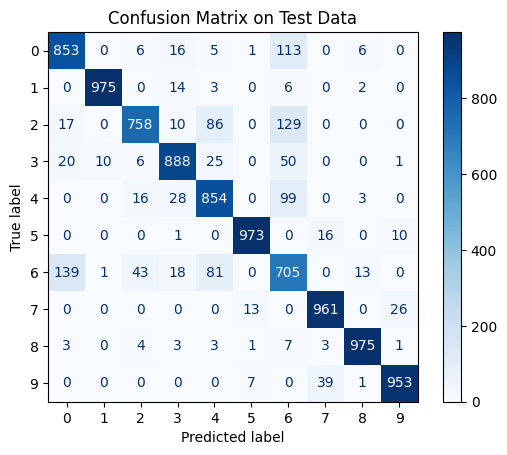

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test accuracy: {test_acc:.4f}")

# Predictions and confusion matrix
y_pred = model.predict(x_test)
y_pred_labels = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Test Data")
plt.show()
